Found 13123 images belonging to 4 classes.
Found 4121 images belonging to 4 classes.
Epoch 1/10


C:\Users\saite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


411/411 ━━━━━━━━━━━━━━━━━━━━ 1193s 3s/step - accuracy: 0.6301 - loss: 0.8890 - val_accuracy: 0.6926 - val_loss: 0.7712 - learning_rate: 1.0000e-05
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1207s 3s/step - accuracy: 0.6955 - loss: 0.7581 - val_accuracy: 0.7404 - val_loss: 0.6761 - learning_rate: 1.0000e-05
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1205s 3s/step - accuracy: 0.7394 - loss: 0.6642 - val_accuracy: 0.7700 - val_loss: 0.6121 - learning_rate: 1.0000e-05
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1220s 3s/step - accuracy: 0.7564 - loss: 0.6266 - val_accuracy: 0.7942 - val_loss: 0.5635 - learning_rate: 1.0000e-05
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1225s 3s/step - accuracy: 0.7761 - loss: 0.5750 - val_accuracy: 0.7872 - val_loss: 0.5534 - learning_rate: 1.0000e-05
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1229s 3s/step - accuracy: 0.7897 - loss: 0.5388 - val_accuracy: 0.7918 - val_loss: 0.5332 - learning_rate: 1.0000e-05
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 1183s 3s/step - accurac

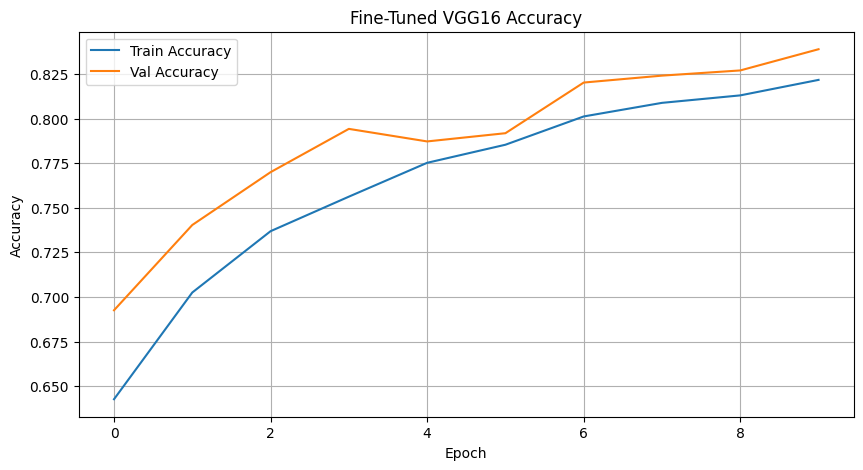

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load your previously trained model
model = load_model("models/vgg16_transfer_teeth_health.h5")

# Unfreeze the last few layers of the base VGG16 model
for layer in model.layers[-6:]:  # Adjust if needed
    if hasattr(layer, 'trainable'):
        layer.trainable = True

# Recompile with a lower learning rate
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Paths to  folders
base_dir = "D:/Major Project/normalized"
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")

# Data generators (same as before)
IMG_SIZE = (224, 224)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical'
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# model
fine_tune_history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    callbacks=[early_stop, lr_scheduler]
)

# Saving the model
model.save("models/vgg16_transfer_teeth_health_finetuned.h5")

# PPerformance plots
plt.figure(figsize=(10, 5))
plt.plot(fine_tune_history.history['accuracy'], label="Train Accuracy")
plt.plot(fine_tune_history.history['val_accuracy'], label="Val Accuracy")
plt.title("Fine-Tuned VGG16 Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
